In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Load the data
df = pd.read_csv('./walmart_data.csv')
# df
df.columns = [c.lower() for c in df.columns]
# df
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
df.dtypes

user_id                        int64
product_id                    object
gender                        object
age                           object
occupation                     int64
city_category                 object
stay_in_current_city_years    object
marital_status                 int64
product_category               int64
purchase                       int64
dtype: object

<AxesSubplot:>

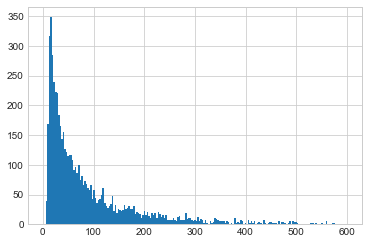

In [4]:
df.groupby(['user_id']).product_id.count().hist(bins=np.linspace(0, 600, 200))

In [5]:
df2 = pd.DataFrame({
    'column_1': [1, 2, 3, 4, 5],
    'column_2': [10, 15, 10, 20, 25]
})

(array([[1., 2., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 2., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
         0., 0., 0.]]),
 array([ 0.        ,  1.57894737,  3.15789474,  4.73684211,  6.31578947,
         7.89473684,  9.47368421, 11.05263158, 12.63157895, 14.21052632,
        15.78947368, 17.36842105, 18.94736842, 20.52631579, 22.10526316,
        23.68421053, 25.26315789, 26.84210526, 28.42105263, 30.        ]),
 <a list of 2 BarContainer objects>)

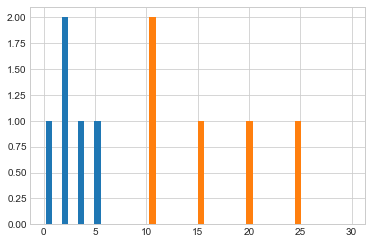

In [6]:
plt.hist(df2, bins=np.linspace(0, 30, 20))

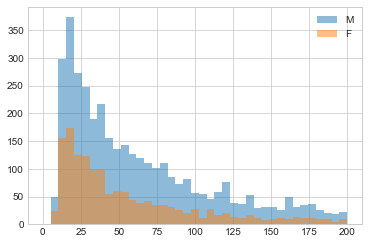

In [7]:
df.groupby(['user_id', 'gender']).product_id.count().unstack().pipe(
    lambda d: (
        d.M.dropna().hist(bins=np.linspace(0, 200, 40), alpha=0.5, label='M'),
        d.F.dropna().hist(bins=np.linspace(0, 200, 40), alpha=0.5, label='F')
    )
)
plt.legend()

<AxesSubplot:xlabel='product_id'>

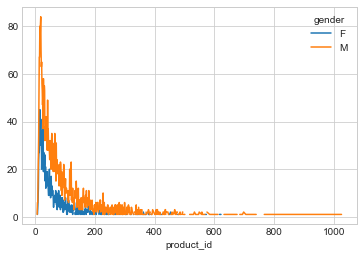

In [8]:
df.groupby(['user_id', 'gender']).product_id.count().reset_index().groupby([
    'product_id',
    'gender',
]).user_id.count().unstack().plot()

In [9]:
df.groupby('gender')['purchase'].mean()

gender
F    8734.565765
M    9437.526040
Name: purchase, dtype: float64

In [10]:
df.describe()

,user_id,occupation,marital_status,product_category,purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [11]:
import seaborn as sns

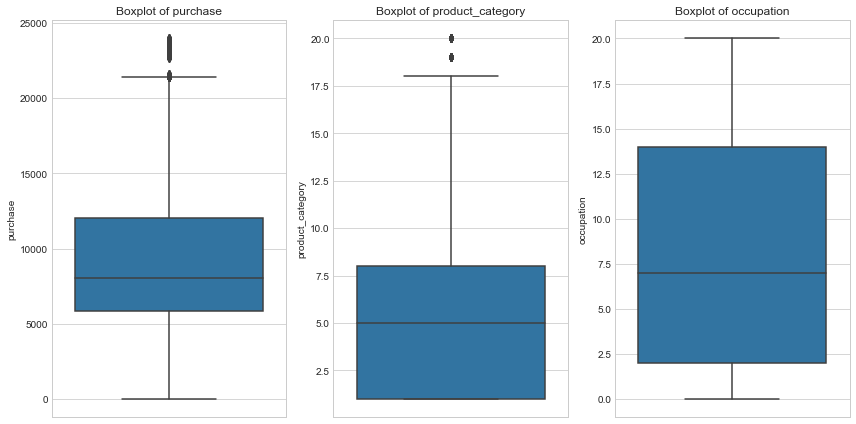

In [12]:
numerical_cols = ['purchase', 'product_category', 'occupation']

plt.figure(figsize=(12,6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [13]:
def detect_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 + 1.5 * iqr
    upper_bound = q3 - 1.5 * iqr
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_purchase = detect_outliers_iqr(df, 'purchase')
print(f"number of outliers in 'purchase' using iqr method: {len(outliers_purchase)}")

number of outliers in 'purchase' using iqr method: 550068


In [14]:
from scipy.stats import zscore

df['purchase_z'] = zscore(df['purchase'])

outliers_z = df[(df['purchase_z'] > 3) | (df['purchase_z'] < -3)]

print(f"number of outliers in 'purchase' using z-score method: {len(outliers_z)}")

number of outliers in 'purchase' using z-score method: 0


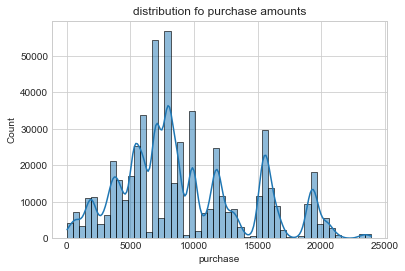

In [15]:
sns.histplot(df['purchase'], bins=50, kde=True)
plt.title('distribution fo purchase amounts')
plt.show()

In [16]:
df.groupby('user_id')['purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
user_id,,,,,,,,
1000001,35.0,9545.514286,4639.871552,612.0,7884.50,9946.0,12305.50,19219.0
1000002,77.0,10525.610390,4301.736734,119.0,7818.00,9899.0,11973.00,20657.0
1000003,29.0,11780.517241,5358.428805,3646.0,6953.00,12103.0,15592.00,19631.0
1000004,14.0,14747.714286,5801.640132,481.0,15488.50,15852.5,19087.00,19693.0
1000005,106.0,7745.292453,4110.717354,1938.0,4551.75,6168.0,8823.00,21021.0
...,...,...,...,...,...,...,...,...
1006036,514.0,8007.894942,4403.756640,137.0,5295.50,7483.0,9739.25,23525.0
1006037,122.0,9176.540984,4582.640828,579.0,5946.00,8063.5,12043.25,23714.0
1006038,12.0,7502.833333,3625.373381,365.0,5814.00,6895.5,9031.50,13565.0


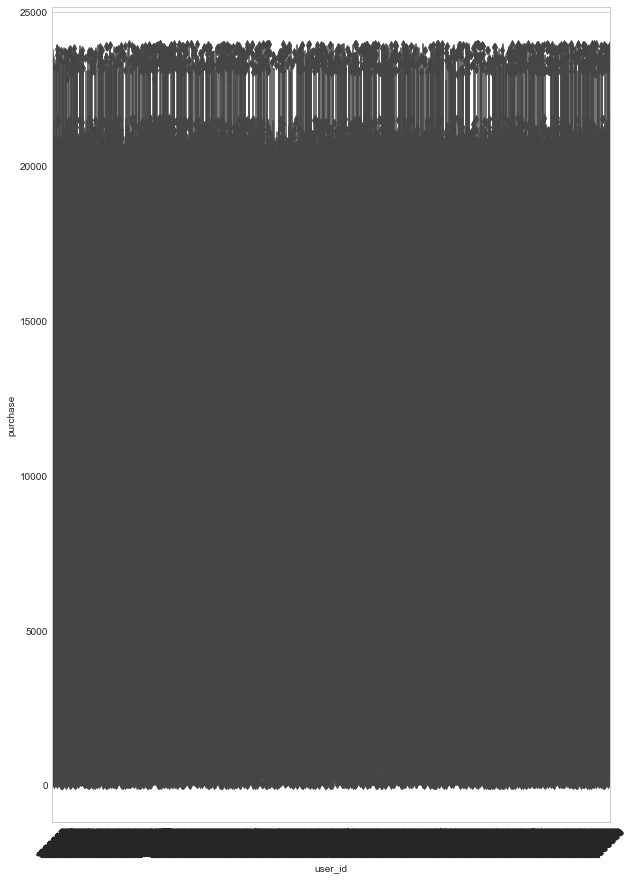

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,15))
sns.boxplot(x='user_id', y='purchase', data=df)
plt.xticks(rotation=45)
plt.show()

In [18]:
from scipy.stats import f_oneway

categories = df['gender'].unique()
groups = [df[df['gender'] == category]['purchase'] for category in categories]

f_stat, p_value = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_value}")

ANOVA F-statistic: 2010.4424717228965, p-value: 0.0
